<img src="https://wallpaperaccess.com/full/1308159.jpg" alt="Amazon.com" class="center">

- Domain - E-commerce
- Context - Everyday a million products are being recommended to users based on
popularity and other metrics on e-commerce websites. The most popular e-commerce
website boosts average order value by 50%, increases revenues by 300%, and
improves conversion. In addition to being a powerful tool for increasing revenues,
product recommendations are so essential that customers now expect to see similar
features on all other eCommerce sites.
- Data Description -
Data columns- First three columns are userId, productId, and ratings and the fourth
column is timestamp. You can discard the timestamp column as in this case you may
not need to use it.
- Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The
repository has several datasets. For this case study, we are using the Electronics
dataset.
- Learning Outcomes <br/>
Exploratory Data Analysis<br/>
Data Wrangling <br/>
Build a Popularity recommender model <br/>
Build Collaborative Filtering model <br/>

- Objective - To make a recommendation system that recommends at least five(5)
new products based on the user's habits.



<center style="background-color:tomato"> Load libraries </center>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

<center style="background-color:tomato">  1. Read and explore the given dataset </center>

In [9]:
df = pd.read_csv('/home/weiss/.dgl/electronic/amazon-electronic-product-recommendation.csv', sep=',',
                names=['userId','productId','rating','timestamp'])
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [11]:
df.shape

(7824482, 4)

In [12]:
df.rating.describe()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<center style="background-color:tomato"> 2. Take a subset of the dataset to make it less sparse/ denser </center>

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.drop(columns=["timestamp"], inplace=True)

In [15]:
# take 10 % of the data
# df = df[:int(len(df) * .1)]

# take everything...

df.shape

(7824482, 3)

In [16]:
# find minimum and maximum ratings
print('The minimum rating is: %d' %(df['rating'].min()))
print('The maximum rating is: %d' %(df['rating'].max()))

The minimum rating is: 1
The maximum rating is: 5


In [17]:
df.groupby('userId')['rating'].mean().sort_values(ascending=False).head(10)  

userId
A00000262KYZUE4J55XGL    5.0
A2E5Z0FJB6EQAX           5.0
A3UBAAG67M56ET           5.0
A2E5YU75N551K            5.0
A3UBAB0AZJQ41O           5.0
A3UBABSNYPHVLS           5.0
A2E5YQ26BVDMGJ           5.0
A2E5YN34J00OY0           5.0
A3UBACQC3GKPXM           5.0
A2E5YHLO38AT28           5.0
Name: rating, dtype: float64

/home/weiss/.conda/envs/GNN/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/weiss/.conda/envs/GNN/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


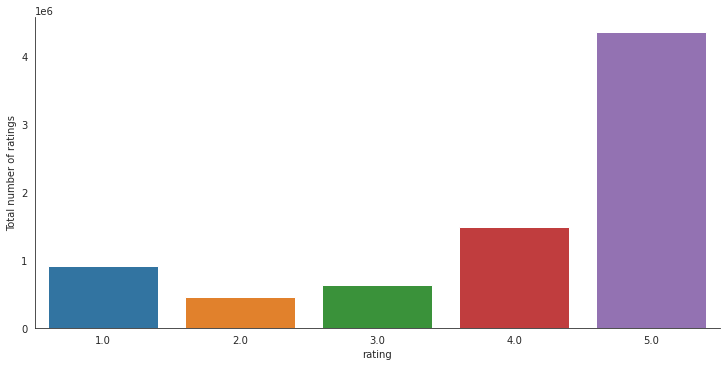

In [18]:
# check the Rating distribution in the range 1-5 for the Data given 

with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [19]:
print("Total data ")
print("*"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.userId)))
print("Total No of products  :", len(np.unique(df.productId)))

Total data 
**************************************************

Total no of ratings : 7824482
Total No of Users   : 4201696
Total No of products  : 476002


In [20]:
#Keep the users where the user has rated more than n items

n = 50

counts1 = df['userId'].value_counts()
#print(counts1)
Data_new = df[df['userId'].isin(counts1[counts1 >= n].index)]
#counts1

In [21]:
#highest rated products from the selected records. 

Data_new.groupby('productId')['rating'].mean().sort_values(ascending=False) 

productId
0594451647    5.0
B003RRY9RS    5.0
B003RR95Q8    5.0
B003RIPMZU    5.0
B003RFRNYQ    5.0
             ... 
B000IZ8GKS    1.0
B000C77B4O    1.0
B008EVTDFK    1.0
B000MUNSPM    1.0
B003CJTQJM    1.0
Name: rating, Length: 48190, dtype: float64

In [22]:
#Calculate the density of the rating matrix

final_ratings_matrix = Data_new.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


In [23]:
final_ratings_matrix

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00LED02VY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00LGN7Y3G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00LGQ6HL8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<center style="background-color:tomato">  3. Build Popularity Recommender model. </center>

In [25]:
#Count of user_id for each unique product as recommendation score 
Data_new_grouped = Data_new.groupby('productId').agg({'userId': 'count'}).reset_index()
Data_new_grouped.rename(columns = {'userId': 'score'},inplace=True)
Data_new_grouped

,productId,score
0,0594451647,1
1,0594481813,1
2,0970407998,2
3,0972683275,4
4,1400501466,6
...,...,...
48185,B00LED02VY,1
48186,B00LGN7Y3G,1
48187,B00LGQ6HL8,5
48188,B00LI4ZZO8,2


In [26]:
#Sort the products on recommendation score 
train_data_sort = Data_new_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 

In [27]:
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 

In [28]:
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,score,Rank
39003,B0088CJT4U,206,1.0
24827,B003ES5ZUU,184,2.0
11078,B000N99BBC,167,3.0
38250,B007WTAJTO,164,4.0
38615,B00829TIEK,149,5.0


In [29]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [30]:
find_recom = [15,21,53]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

       userId   productId  score  Rank
39003      15  B0088CJT4U    206   1.0
24827      15  B003ES5ZUU    184   2.0
11078      15  B000N99BBC    167   3.0
38250      15  B007WTAJTO    164   4.0
38615      15  B00829TIEK    149   5.0


Here is the recommendation for the userId: 21

       userId   productId  score  Rank
39003      21  B0088CJT4U    206   1.0
24827      21  B003ES5ZUU    184   2.0
11078      21  B000N99BBC    167   3.0
38250      21  B007WTAJTO    164   4.0
38615      21  B00829TIEK    149   5.0


Here is the recommendation for the userId: 53

       userId   productId  score  Rank
39003      53  B0088CJT4U    206   1.0
24827      53  B003ES5ZUU    184   2.0
11078      53  B000N99BBC    167   3.0
38250      53  B007WTAJTO    164   4.0
38615      53  B00829TIEK    149   5.0




/home/weiss/.conda/envs/GNN/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/weiss/.conda/envs/GNN/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/weiss/.conda/envs/GNN/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

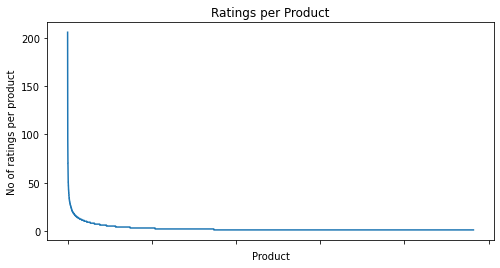

In [31]:
no_of_ratings_per_product = Data_new.groupby(by='productId')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('Ratings per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

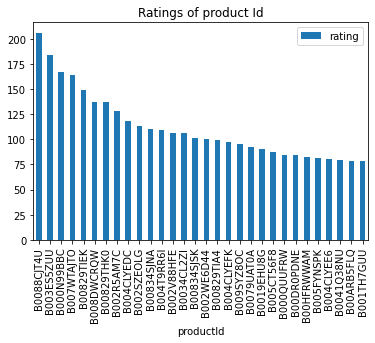

In [32]:
# Top 30 recommendations for the users

popular_products = pd.DataFrame(Data_new.groupby('productId')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar")
plt.title("Ratings of product Id")
plt.show()

<center style="background-color:tomato"> 4. Split the data randomly into a train and test dataset.  </center>

In [34]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from collections import defaultdict

In [36]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data1 = Dataset.load_from_df(Data_new,reader)
data1

In [37]:
#Splitting the dataset
trainset, testset = train_test_split(data1, test_size=0.3,random_state=123)

In [38]:
trainset.ur

defaultdict(list,
            {0: [(0, 5.0),
              (584, 5.0),
              (1913, 5.0),
              (3981, 4.0),
              (4397, 5.0),
              (129, 5.0),
              (211, 5.0),
              (6720, 5.0),
              (1216, 3.0),
              (1511, 4.0),
              (3729, 5.0),
              (11294, 4.0),
              (5122, 5.0),
              (11981, 5.0),
              (11669, 5.0),
              (13206, 5.0),
              (1642, 3.0),
              (2002, 5.0),
              (11033, 5.0),
              (336, 4.0),
              (15577, 5.0),
              (16190, 1.0),
              (4482, 4.0),
              (766, 5.0),
              (16700, 5.0),
              (17902, 5.0),
              (623, 5.0),
              (3058, 3.0),
              (7104, 5.0),
              (19538, 4.0),
              (1209, 4.0),
              (926, 5.0),
              (6246, 5.0),
              (21078, 4.0),
              (21990, 5.0),
              (22708, 3.0),
    

<center style="background-color:tomato"> Build Collaborative Filtering model </center>

In [39]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [40]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [60]:
test_pred[1:5]  # show 5 predictions

[Prediction(uid='AXYM52DNK6NDF', iid='B004C5HM6Y', r_ui=5.0, est=4.265092101828417, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1TQBAHI3M4ZBQ', iid='B000ENRQ3M', r_ui=3.0, est=4.842041679250982, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1TDR7Y90SVCHL', iid='B0055OKHQS', r_ui=5.0, est=4.265092101828417, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2IFKH3TJ10387', iid='B005YR1PV2', r_ui=4.0, est=4.237257960592748, details={'actual_k': 2, 'was_impossible': False})]

<center style="background-color:tomato"> Get top - K ( K = 5) recommendations. </center>

In [42]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [59]:
top_n = get_top_n(test_pred, n=10)
top_n[list(top_n)[0]]  # show 10 predictions only for one user

[('B00B588HY2', 5),
 ('B003VWU2WA', 5),
 ('B001P3PSR6', 5),
 ('B002PX9BX2', 4.869047619047619),
 ('B00723KZTY', 4.869047619047619),
 ('B0002J28NQ', 4.869047619047619),
 ('B003L1717K', 4.869047619047619),
 ('B003WV5DJC', 4.869047619047619),
 ('B005TX3M62', 4.869047619047619),
 ('B000SEQGT2', 4.869047619047619)]

In [50]:
# don't try it with all data...

# Print the recommended items for each user
#for uid, user_ratings in top_n.items():
#    print(uid, [iid for (iid, _) in user_ratings])

In [45]:
uid = "A231WM2Z2JL0U3"  # raw user id (as in the ratings file). They are **strings**!
iid = "B00004RC2D"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=0.0, verbose=True)

user: A231WM2Z2JL0U3 item: B00004RC2D r_ui = 0.00   est = 4.00   {'actual_k': 2, 'was_impossible': False}


In [46]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'A231WM2Z2JL0U3'][['iid', 'r_ui','est']].sort_values(by = 'est',ascending = False).head(10)

,iid,r_ui,est
6138,B00006HZ0L,5.0,5.000000
6417,B00008OE6I,4.0,5.000000
33093,B000083EAI,5.0,5.000000
22746,B00004Y2MM,5.0,5.000000
17374,B00004Y7CF,5.0,5.000000
20475,B00008OE5G,5.0,4.314607
21326,B00005B6UF,5.0,4.314607
22564,B0000691IO,5.0,4.314607
24804,B00004YRVY,4.0,4.314607
25778,B00004SCKA,4.0,4.314607


<center style="background-color:tomato">6. Evaluate the above model </center>

In [47]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0647


1.0647012940137384

<center style="background-color:tomato"> 8. Summarise </center>

- Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

- The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history

- KNN with means recommender system if we have got user rating avaialable and popularity based in case of cold start

<center style="background-color:tomato"> 9. MLN </center>

In [48]:
import torch
from torch import nn
from torch import optim
from torch.optim.lr_scheduler import _LRScheduler

In [49]:
def set_random_seed(state=1):
    gens = (np.random.seed, torch.manual_seed, torch.cuda.manual_seed)
    for set_state in gens:
        set_state(state)

RANDOM_STATE = 1
set_random_seed(RANDOM_STATE)